## Movie 4: Functional roles of NHE1 and/or SWELL1 in cell dissemination from 3D breast cancer spheroids embedded on 2D collagen I-coated surfaces

In [1]:
%matplotlib inline
from skimage import io
from skimage.filters import threshold_otsu
from skimage.filters.rank import entropy
from skimage.morphology import disk
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

movie4_path = "movies/movie4.avi"

In [2]:
# This cell was used to store each frame from the video to be used for calibrating and testing parameters
#movie_path = "movies/movie4.avi"
#output_path = "movies/movie4"
#movie = cv2.VideoCapture(movie_path)
#count = 0
#while movie.isOpened():
#    count += 1
#    success, frame = movie.read()
#    if not success:
#        break
#    cv2.imwrite(f'{output_path}/frame{count}.jpg', frame)

#movie.release()
#cv2.destroyAllWindows()

## Calibrate and estimate parameters for segments
### Approach for measuring cell migration rate
- Each grayed frame was segmented based on entropy - Amount of disorder
- The mean pixel value of each entropy frame is used to represent the extent of cell migration
- By subtracting the starting mean pixel, the change in entropy with respect to the starting position is obtained
### Applying the algorithm
- Regions of each frame that were not relevant for the analysis were covered by drawing empty (black colored) rectangles over the inverted frames

In [4]:
img_raw = io.imread("movies/movie4/frame23.jpg")

sc_frame = img_raw[80:590, :520]
sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)

dual_kd_frame = img_raw[80:590, 550:]
dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)

sc_entropy_frame = entropy(sc_frame_gray, disk(5))
dual_kd_entropy_frame = entropy(dual_kd_frame_gray, disk(5))

print("SC Entropy:", cv2.mean(sc_entropy_frame)[0])
print("Dual KD Entropy:", cv2.mean(dual_kd_entropy_frame)[0])
#plt.imshow(dual_kd_entropy_frame)

SC Entropy: 4.3194122133842185
Dual KD Entropy: 3.5070111097342345


## Mean pixels of entropy frames as measure of cell migration rate
- The mean pixel values obtained with 'cv2.mean()' are used as entropy values
- Each value in each frame is appended to the 'entropies' list which will be converted to a Pandas dataframe for analysis
- The time interval between each frame is 20 minutes.

In [9]:
print("Press 'q' to end video")
cap = cv2.VideoCapture(movie4_path)

# Get movie frame size
width = 640
height = 480
frame_size = (width,height)

output_frames = "movies/out4"

frame_index = 0 # Track frame number for fluorescent intensity table

entropies = []

while True:
    frame_index += 1
    success, frame = cap.read()

    if success and frame.size != 0:
        # Isolate regions of interest
        sc_frame = frame[80:590, :520]
        sc_frame = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2RGB)
        sc_frame_gray = cv2.cvtColor(sc_frame, cv2.COLOR_BGR2GRAY)

        dual_kd_frame = frame[80:590, 550:]
        dual_kd_frame = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2RGB)
        dual_kd_frame_gray = cv2.cvtColor(dual_kd_frame, cv2.COLOR_BGR2GRAY)

        sc_entropy_frame = entropy(sc_frame_gray, disk(5))
        dual_kd_entropy_frame = entropy(dual_kd_frame_gray, disk(5))

        sc_entropy = cv2.mean(sc_entropy_frame)[0]
        dual_kd_entropy = cv2.mean(dual_kd_entropy_frame)[0]

        print(sc_entropy, dual_kd_entropy)

        # Append entropy data
        entropies.append([frame_index, sc_entropy, dual_kd_entropy, (frame_index*20)-20])

        # Add regions to blank canvas
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        canvas = np.ones((frame_gray.shape), np.uint8)
        canvas[80:590, :520] = sc_frame_gray
        canvas[80:590, 550:] = dual_kd_frame_gray

        # Resize frame
        sc = cv2.resize(sc_frame_gray, frame_size)
        dual_kd = cv2.resize(dual_kd_frame_gray, frame_size)

        sc_dual_kd_stack = np.hstack((sc, dual_kd))

        # For some reason, I could not save the video directly. So I had to save each frame first, then use them to generate a video
        cv2.imwrite(f'{output_frames}/frame{frame_index}.jpg', sc_dual_kd_stack, [cv2.IMWRITE_JPEG_QUALITY, 90])

        cv2.imshow("Movie 4", sc_dual_kd_stack)

    else:
        break

    # 1 frame per second
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Save video
video_frames = os.listdir(output_frames)
video_frame = cv2.imread(os.path.join(output_frames, video_frames[0]))
height, width, layers = video_frame.shape

video = cv2.VideoWriter('output4.avi', 0, 1, (width, height))
for f in video_frames:
    video.write(cv2.imread(os.path.join(output_frames, f)))

video.release()

cap.release()
cv2.destroyAllWindows()
print("Video saved in movies/out4")

Press 'q' to end video
2.9006824104288027 2.8785049663972226
3.008465649497564 2.8853162718595495
3.0653026238532037 2.907404058624967
3.0974128705961665 2.9433645118083542
3.100347586081663 2.960391893916366
3.4964292761554394 2.9917337852796813
3.5817275679105434 3.0214026726721075
3.6024172566513086 3.038509152198692
3.620407667327311 3.080694532981814
3.660349323775968 3.1025863100732467
3.7027639712174265 3.126037359042012
3.7378191851582763 3.164686866396676
3.821347846578284 3.1609638779854827
3.842315358112233 3.1967829931226244
3.9119578425671753 3.2384923728256267
3.9477280920659625 3.2348832757565056
4.026168246338488 3.279772424932929
4.076192119331833 3.288581106561664
4.145744503583884 3.3291044030699006
4.1827998181633665 3.399426260483108
4.2271314870201255 3.407727243606781
4.277028229119459 3.386953396308492
4.3166687544562645 3.504890457583119


## Calculate change in entropy
- SC: Scramble Control
- DUAL_KD: Dual NHE1/SWELL1 Knockdown

In [12]:
entropies_dataframe = pd.DataFrame(entropies, columns =  ["Frame", "SC", "DUAL_KD", "Time"])
entropies_dataframe["SC_ENTROPY_CHANGE"] = entropies_dataframe["SC"] - entropies_dataframe["SC"][0]
entropies_dataframe["DUAL_KD_ENTROPY_CHANGE"] = entropies_dataframe["DUAL_KD"] - entropies_dataframe["DUAL_KD"][0]

entropies_dataframe

,Frame,SC,DUAL_KD,Time,SC_ENTROPY_CHANGE,DUAL_KD_ENTROPY_CHANGE
0,1,2.900682,2.878505,0,0.000000,0.000000
1,2,3.008466,2.885316,20,0.107783,0.006811
2,3,3.065303,2.907404,40,0.164620,0.028899
3,4,3.097413,2.943365,60,0.196730,0.064860
4,5,3.100348,2.960392,80,0.199665,0.081887
5,6,3.496429,2.991734,100,0.595747,0.113229
6,7,3.581728,3.021403,120,0.681045,0.142898
7,8,3.602417,3.038509,140,0.701735,0.160004
8,9,3.620408,3.080695,160,0.719725,0.202190
9,10,3.660349,3.102586,180,0.759667,0.224081


## Compare Entropy change in SC cells and Dual KD cells

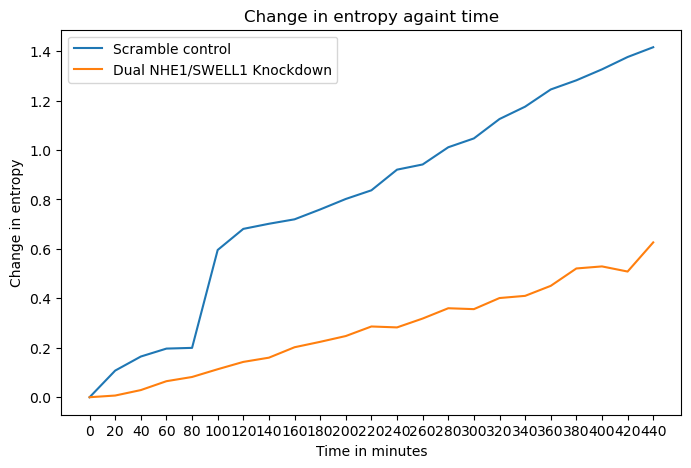

In [15]:
plt.figure(figsize=(8,5))
plt.plot(entropies_dataframe.Time, entropies_dataframe.SC_ENTROPY_CHANGE, label="Scramble control")
plt.plot(entropies_dataframe.Time, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE, label="Dual NHE1/SWELL1 Knockdown")

plt.title("Change in entropy againt time")
plt.ylabel("Change in entropy")
plt.xlabel("Time in minutes")
plt.legend()
plt.xticks(entropies_dataframe.Time)
plt.show()

- SC cells migrate faster over time
- Dual NHE1/SWELL1 knockdown cells show minimal migration

### Slope from fitted regression models

#### Regression model for Entropy change in SC cells

In [20]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(entropies_dataframe.Frame, entropies_dataframe.SC_ENTROPY_CHANGE)
print({"slope":slope, "intercept":intercept, "r":r, "p":p, "std_err":std_err})

{'slope': 0.062409090528346, 'intercept': 0.061243620013251676, 'r': 0.9773630681081079, 'p': 1.200099670742931e-15, 'std_err': 0.0029480461203495135}


### Regression model for Entropy change in Dual Knockdown cells

In [23]:
slope, intercept, r, p, std_err = stats.linregress(entropies_dataframe.Frame, entropies_dataframe.DUAL_KD_ENTROPY_CHANGE)
print({"slope":slope, "intercept":intercept, "r":r, "p":p, "std_err":std_err})

{'slope': 0.02687168424273152, 'intercept': -0.04756473411491724, 'r': 0.9943637209303088, 'p': 5.905673818317654e-22, 'std_err': 0.0006252279672051291}


- The slope of the regression model for entropy change in SC cells is greater (0.0624) than that for Dual KD cells (0.0269)
- Therefore cell migration is faster in SC cells than in Dual KD cells